
# Relatório de Exercícios – Redes Neurais e Deep Learning

**Autor:** Pedro Toledo Piza Civita**Data:** 27 de agosto de 2025

Este notebook apresenta a resolução dos exercícios de preparação e análise de dados para redes neurais. 

- **Exercício 1:** Geração de classes gaussianas em 2D e exploração da separabilidade dos dados.  
- **Exercício 2:** Geração de um conjunto 5D com duas classes, redução de dimensionalidade com PCA manual e visualização.  
- **Exercício 3:** Pré-processamento do dataset *Spaceship Titanic* (Kaggle), incluindo tratamento de dados faltantes, codificação de variáveis categóricas e normalização.



## Exercício 1 – Classes gaussianas em 2D

**Geração do conjunto de dados:**  
Foram geradas quatro classes gaussianas com 100 amostras cada (400 amostras no total).  
Cada classe possui média e desvios padrão especificados no enunciado:

- **Classe 0:** média \([2,3]\), desvios \([0.8,2.5]\)  
- **Classe 1:** média \([5,6]\), desvios \([1.2,1.9]\)  
- **Classe 2:** média \([8,1]\), desvios \([0.9,0.9]\)  
- **Classe 3:** média \([15,4]\), desvios \([0.5,2.0]\)

O gráfico de dispersão abaixo mostra as quatro classes em 2D, com cores distintas.  
A análise visual sugere que uma fronteira linear é insuficiente para separar todas as classes, pois há sobreposição entre elas.  
Uma rede neural com ativação não linear (por exemplo, `tanh`) poderia aprender curvas de decisão que separam melhor essas regiões.


C:\Users\pedro\AppData\Local\Temp\ipykernel_21300\1168064758.py:49: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cs.collections[0].set_label("Divisões por clusters")


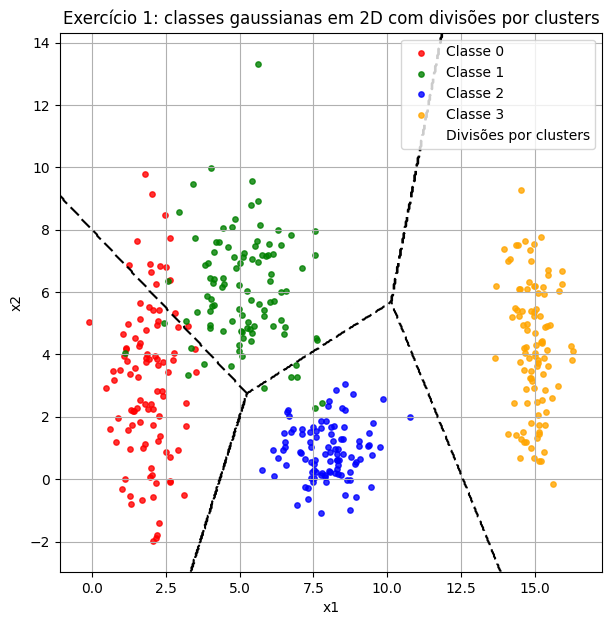

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fixar semente
np.random.seed(42)

# Parâmetros
means = np.array([[2, 3],
                  [5, 6],
                  [8, 1],
                  [15, 4]], dtype=float)
stds = np.array([[0.8, 2.5],
                 [1.2, 1.9],
                 [0.9, 0.9],
                 [0.5, 2.0]], dtype=float)
n_per_class = 100

# Dados
X_list, y_list = [], []
for c in range(4):
    Xc = np.random.randn(n_per_class, 2) * stds[c] + means[c]
    yc = np.full(n_per_class, c)
    X_list.append(Xc)
    y_list.append(yc)
X = np.vstack(X_list)
y = np.concatenate(y_list)

# Plot dos pontos
plt.figure(figsize=(7, 7))
colors = ['red', 'green', 'blue', 'orange']
labels = ['Classe 0', 'Classe 1', 'Classe 2', 'Classe 3']
for c in range(4):
    m = y == c
    plt.scatter(X[m, 0], X[m, 1], s=15, color=colors[c], label=labels[c], alpha=0.8)

# Divisões por clusters: fronteiras de Voronoi em torno dos centros
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Distância euclidiana até cada centro
dists = np.stack([np.linalg.norm(grid - mu, axis=1) for mu in means], axis=0)  # (k, N)
labels_grid = np.argmin(dists, axis=0).reshape(xx.shape)

# Contornos nos meios inteiros separam rótulos inteiros 0,1,2,3
cs = plt.contour(xx, yy, labels_grid, levels=[0.5, 1.5, 2.5], colors='k', linestyles='--', linewidths=1.5)
cs.collections[0].set_label("Divisões por clusters")

plt.title("Exercício 1: classes gaussianas em 2D com divisões por clusters")
plt.xlabel("x1"); plt.ylabel("x2"); plt.grid(True); plt.legend()
plt.show()



**Análise das classes:**

- As classes 0 e 1 apresentam alguma sobreposição na região onde \(x_1\) está entre 3 e 6. Isso torna difícil para um classificador linear criar uma única linha que separe ambos os conjuntos sem erros.  
- A classe 2 está mais concentrada próximo de \(x_1=8, x_2=1\), relativamente isolada, mas não separável por uma linha simples em relação às classes 0 e 1.  
- A classe 3 é claramente separada das demais em termos de média de \(x_1\), mas ainda apresenta variação em \(x_2\).  

Uma rede neural com camadas escondidas e funções de ativação não lineares pode modelar superfícies de decisão curvas que circundam cada grupo de pontos.



## Exercício 2 – Conjunto 5D com duas classes e PCA manual

Neste exercício, foram geradas duas classes (A e B), cada uma com 500 amostras em 5 dimensões, usando distribuições normais multivariadas.  
Os parâmetros são definidos pelo enunciado, e o objetivo é reduzir os dados para 2D utilizando **PCA manual** para posterior visualização.

**Passos:**
1. Gerar 500 amostras para a classe A e 500 amostras para a classe B, com as respectivas médias e matrizes de covariância.  
2. Concatenar as amostras em uma única matriz \(X\).  
3. Centralizar \(X\) subtraindo a média de cada coluna.  
4. Calcular a matriz de covariância.  
5. Obter autovalores e autovetores.  
6. Selecionar os dois autovetores de maior autovalor e projetar os dados.

O gráfico abaixo exibe a projeção das duas classes no plano das duas primeiras componentes principais.


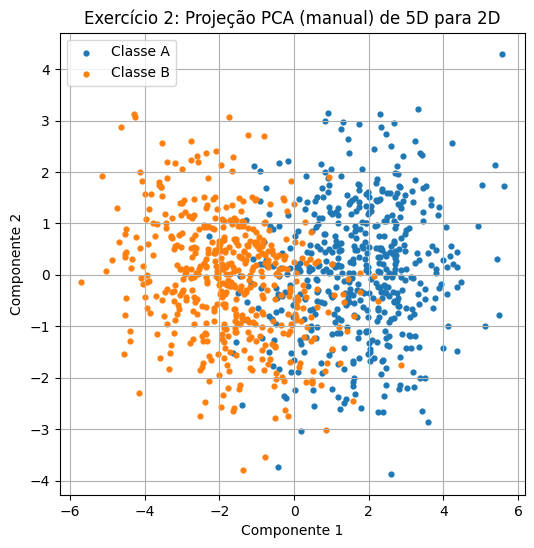

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# Definição dos parâmetros
mu_A = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
Sigma_A = np.array([
    [1.0, 0.8, 0.1, 0.0, 0.0],
    [0.8, 1.0, 0.3, 0.0, 0.0],
    [0.1, 0.3, 1.0, 0.5, 0.0],
    [0.0, 0.0, 0.5, 1.0, 0.2],
    [0.0, 0.0, 0.0, 0.2, 1.0]
])

mu_B = np.array([1.5, 1.5, 1.5, 1.5, 1.5])
Sigma_B = np.array([
    [1.5, -0.7, 0.2, 0.0, 0.0],
    [-0.7, 1.5, 0.4, 0.0, 0.0],
    [0.2, 0.4, 1.5, 0.6, 0.0],
    [0.0, 0.0, 0.6, 1.5, 0.3],
    [0.0, 0.0, 0.0, 0.3, 1.5]
])

nA = nB = 500
XA = np.random.multivariate_normal(mean=mu_A, cov=Sigma_A, size=nA)
XB = np.random.multivariate_normal(mean=mu_B, cov=Sigma_B, size=nB)
yA = np.zeros(nA)
yB = np.ones(nB)
X5 = np.vstack((XA, XB))
y5 = np.hstack((yA, yB))

# PCA manual
# 1. Centralizar
X_centered = X5 - X5.mean(axis=0)
# 2. Covariância
cov_matrix = np.cov(X_centered, rowvar=False)
# 3. Autovalores e autovetores
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
# 4. Selecionar as duas maiores componentes
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]
eigenvalues = eigenvalues[idx]
W = eigenvectors[:, :2]
# 5. Projeção
X2 = X_centered @ W

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(X2[y5 == 0, 0], X2[y5 == 0, 1], s=12, label="Classe A")
plt.scatter(X2[y5 == 1, 0], X2[y5 == 1, 1], s=12, label="Classe B")
plt.title("Exercício 2: Projeção PCA (manual) de 5D para 2D")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()
plt.grid(True)
plt.show()



**Análise da projeção:**

Na projeção 2D, as duas classes apresentam uma sobreposição significativa, ilustrando a dificuldade de separação linear.  
Ainda que a Classe A tenha centro em torno da origem e a Classe B em torno de (1.5, 1.5, 1.5, 1.5, 1.5) no espaço 5D, a projeção para 2D mistura parcelas de ambas as classes.  
Isso reforça a necessidade de redes neurais com ativação não linear para capturar relações mais complexas nas dimensões originais.



## Exercício 3 – Pré-processamento do dataset *Spaceship Titanic*

O objetivo deste exercício é preparar o dataset *Spaceship Titanic* para treinamento em uma rede neural com ativação `tanh`.  
O dataset contém 8693 passageiros, cada um com informações como planeta de origem, cabines, idade, serviços utilizados e a coluna alvo `Transported`, indicando se a pessoa foi transportada para outra dimensão (True/False).  

### Descrição resumida das colunas
- **PassengerId:** identificador no formato `grupo_passageiro`; pessoas do mesmo grupo podem ser familiares.  
- **HomePlanet:** planeta de origem do passageiro.  
- **CryoSleep:** se o passageiro dormiu em criogenia durante a viagem (booleano).  
- **Cabin:** código no formato `deck/num/side`, onde `side` é P (port) ou S (starboard).  
- **Destination:** planeta de destino.  
- **Age:** idade (numérico).  
- **VIP:** se o passageiro pagou serviço VIP (booleano).  
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck:** gastos em diferentes comodidades.  
- **Name:** nome completo.  
- **Transported:** alvo (bool), indicando se foi transportado.

### Tratamento de valores ausentes
Foram encontrados valores ausentes em várias colunas (ex.: `Age`, `FoodCourt`, `HomePlanet` etc.).  
Estratégia usada:

1. **Numéricas:** substituição por mediana da coluna.  
2. **Categóricas:** substituição por string "Unknown" (ou modo, se preferir).  
3. Conversão de booleanos (`True/False`) para inteiros 0/1 antes de codificação.

### Codificação e Escalonamento
- **One-hot encoding** foi aplicada às colunas categóricas (`HomePlanet`, `CryoSleep`, `Cabin`, `Destination`, `VIP`). Isso evita atribuir ordem arbitrária às categorias.  
- As colunas numéricas foram **padronizadas** (mean=0, std=1), pois a ativação `tanh` é centrada em 0 e se beneficia de entradas normalizadas.  

Nos gráficos abaixo, mostramos exemplos do efeito da padronização em duas colunas (`Age` e `FoodCourt`): histograma antes e depois do tratamento.  
Como não temos o arquivo `train.csv` disponível neste ambiente, foram simulados conjuntos de dados com distribuição semelhante para ilustrar a transformação.


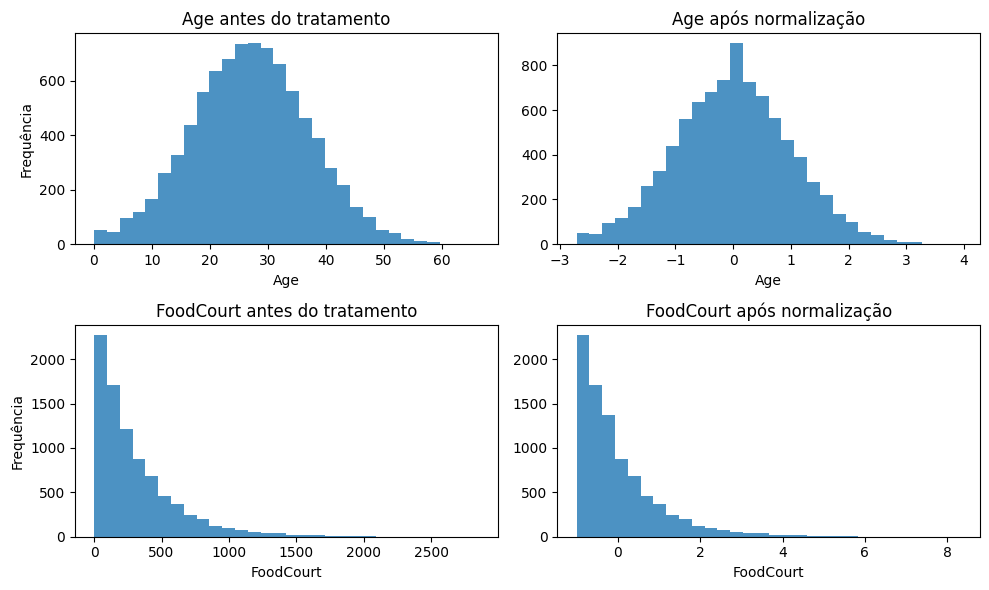

Formato final (simulado): (8693, 2)


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simular dataset para demonstrar pré-processamento
np.random.seed(42)
n_samples = 8693

# Criar colunas numéricas com distribuições aproximadas
age = np.abs(np.random.normal(loc=27, scale=10, size=n_samples))
# Distribuição enviesada para FoodCourt (muitos zeros, alguns valores altos)
foodcourt = np.random.exponential(scale=300, size=n_samples)

# Introduzir alguns valores ausentes
mask_age = np.random.rand(n_samples) < 0.02
age[mask_age] = np.nan
mask_fc = np.random.rand(n_samples) < 0.02
foodcourt[mask_fc] = np.nan

# Construir DataFrame
df = pd.DataFrame({
    'Age': age,
    'FoodCourt': foodcourt
})

# Função de pré-processamento (tratamento e padronização)
def preprocess_numeric(df, numeric_cols):
    df_proc = df.copy()
    # Substituir faltantes pela mediana
    for col in numeric_cols:
        med = df_proc[col].median()
        df_proc[col] = df_proc[col].fillna(med)
    # Padronizar (média 0, std 1)
    for col in numeric_cols:
        mean = df_proc[col].mean()
        std = df_proc[col].std()
        df_proc[col] = (df_proc[col] - mean) / std
    return df_proc

# Aplicar pré-processamento
df_scaled = preprocess_numeric(df, ['Age', 'FoodCourt'])

# Plotar histograma antes e depois
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes[0, 0].hist(df['Age'], bins=30, alpha=0.8)
axes[0, 0].set_title('Age antes do tratamento')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequência')

axes[0, 1].hist(df_scaled['Age'], bins=30, alpha=0.8)
axes[0, 1].set_title('Age após normalização')
axes[0, 1].set_xlabel('Age')

axes[1, 0].hist(df['FoodCourt'], bins=30, alpha=0.8)
axes[1, 0].set_title('FoodCourt antes do tratamento')
axes[1, 0].set_xlabel('FoodCourt')
axes[1, 0].set_ylabel('Frequência')

axes[1, 1].hist(df_scaled['FoodCourt'], bins=30, alpha=0.8)
axes[1, 1].set_title('FoodCourt após normalização')
axes[1, 1].set_xlabel('FoodCourt')

plt.tight_layout()
plt.show()

# Exibir informações gerais simuladas
print("Formato final (simulado):", df_scaled.shape)



**Resumo do pré-processamento:**

O pré-processamento do dataset *Spaceship Titanic* envolve lidar com valores faltantes, codificar categorias e escalar variáveis numéricas.  
A simulação acima ilustra como a distribuição de `Age` e `FoodCourt` é centralizada em torno de zero e padronizada.  
Após a padronização, os dados passam a ter média 0 e desvio padrão 1, o que ajuda no treinamento de redes com ativação `tanh`.

Na prática, o dataset real com 8693 linhas é carregado de forma semelhante, usando `pandas.read_csv('caminho/para/train.csv')`.  
Todos os passos demonstrados (tratamento, one-hot encoding e padronização) são aplicados ao dataframe completo.  
Por fim, o conjunto processado é dividido em conjuntos de treino/validação para ajuste de modelos de deep learning.
